In [1]:
import glob
import matplotlib as mlib
import matplotlib.pyplot as plt
import numpy as np
from numpy.core.defchararray import add
from numpy import genfromtxt
from numpy import loadtxt
import re
import csv
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.patches as mpatches

In [2]:
#Plotting settings
font = {
        'weight' : 'normal',
        'size'   : 16}

mlib.rc('font', **font)

In [3]:
# general plotting function
def plotGen(inputfile, lineScatterFillORPolygon, color, linewidthORmarkersize):
    data = np.array(genfromtxt(inputfile,  comments="#", delimiter='\t'))
    #print(lineScatterFillORPolygon)
    
    if (lineScatterFillORPolygon=="polygon"):
        ax.fill(data[:,0],data[:,1], color)
    else:
        data=data[np.argsort(data[:, 0])]

        if (lineScatterFillORPolygon=="line"):
            ax.plot(data[:,0],data[:,1],c=color,linewidth=linewidthORmarkersize)
        if (lineScatterFillORPolygon=="scatter"):
            ax.plot(data[:,0],data[:,1],c=color,s=linewidthORmarkersize)
        if (lineScatterFillORPolygon=="fill"):
            ax.fill_between(data[:,0],data[:,1],10**(0),color=color,linewidth=linewidthORmarkersize,alpha=0.5)
            
def plotColumns(inputfile, X, Y, lineScatterFillORPolygon, color, linewidthORmarkersize):
    data = np.array(genfromtxt(inputfile,  comments="#", delimiter='\t'))
    #print(lineScatterFillORPolygon)
    
    if (lineScatterFillORPolygon=="polygon"):
        ax.fill(data[:,X],data[:,Y], color)
    else:
        data=data[np.argsort(data[:,X])]

        if (lineScatterFillORPolygon=="line"):
            ax.plot(data[:,X],data[:,Y],c=color,linewidth=linewidthORmarkersize)
        if (lineScatterFillORPolygon=="scatter"):
            ax.plot(data[:,X],data[:,Y],c=color,s=linewidthORmarkersize)
        if (lineScatterFillORPolygon=="fill"):
            ax.fill_between(data[:,X],data[:,Y],10**(0),color=color,linewidth=linewidthORmarkersize,alpha=0.5)
            
#Plot all the data in folder
def plotFromFolder(folder,iftoreverse,lineScatterFillORPolygon,colorMAP,width):
    
    colormap=colorMAP
    
    #reading files with histos info (reverse fuction changes the order of the files)
    files = sorted(glob.glob( folder+'/*.dat'),reverse=iftoreverse)
    #print(files)
    
    normalize = mcolors.Normalize(0, len(files))
    
    global usedcolors
    usedcolors=[]
    for filenum, file in enumerate(files):
        print(file)
        
        plotGen(file,lineScatterFillORPolygon,colormap(normalize(filenum)),width)
        
        usedcolors.append(colormap(normalize(filenum)))

#Plot data from file
def plotFromFile(file,headers,ylist,lineScatterFillORPolygon,colorMAP,width):
    
    colormap=colorMAP
    
    data = np.array(genfromtxt(file,  comments="#", delimiter='\t',skip_header=headers))
    
    normalize = mcolors.Normalize(0, len(ylist))
    
    global usedcolors
    usedcolors=[]
    for ynum, y in enumerate(ylist):

        
        plotColumns(file,0,y,lineScatterFillORPolygon,colormap(normalize(ynum)),width)
        
        usedcolors.append(colormap(normalize(ynum)))

# function that plots cut-out regions from 1612.07818
def whiteregions(m):
    return np.heaviside(m - 0.25,0)*np.heaviside(-m + 0.4,0) + np.heaviside(m - 0.5,0)*np.heaviside(-m + 2.9,0)\
    + np.heaviside(m - 3.2,0)*np.heaviside(-m + 3.6,0) + np.heaviside(m - 3.9,0)*np.heaviside(-m + 4.7,0)

def plotWhiteRegions(yupper):
    m=np.linspace(0.2,5,num=100);
    plt.fill_between(m,whiteregions(m),yupper,color="white",zorder=1)

# Reference plotting routine with the wrong mumu bounds

results/LHCB/0-m-alpha_exclusion_DBR0_Bplus-Kplus.dat
results/LHCB/1-0-m-alpha_exclusion_DBR0.5_Bplus-Kplus.dat
results/LHCB/2-0-m-alpha_exclusion_DBR0.9_Bplus-Kplus.dat
results/LHCB/3-0-m-alpha_exclusion_DBR0.97_Bplus-Kplus.dat
results/LHCB/4-0-m-alpha_exclusion_DBR0.98_Bplus-Kplus.dat


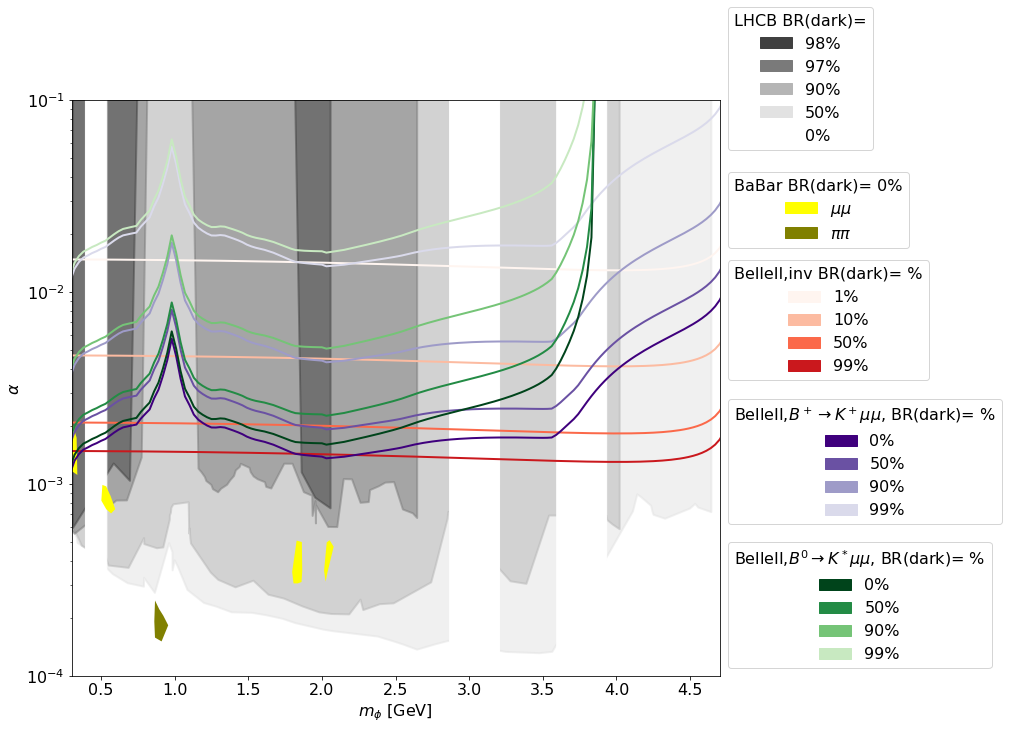

In [18]:
fig=plt.figure(figsize=(15, 10))
ax  = fig.add_subplot(111)
ax.set_position([0.1,0.1,0.6,0.8])

#LHCB plots
plotFromFolder("results/LHCB",False,"fill",cm.Greys,2)
plotWhiteRegions(10**(0))



babarFolder="results/BaBar/"
belleIIFoder="results/BelleII/"

mucolor="yellow"
picolor="olive"

#BaBar plots
plotGen(babarFolder+"0-0-m-alpha_exclusion_DBR0_BaBar_mumu.dat","polygon", mucolor,1)
plotGen(babarFolder+"0-1-m-alpha_exclusion_DBR0_BaBar_mumu.dat","polygon", mucolor,1)
plotGen(babarFolder+"0-2-m-alpha_exclusion_DBR0_BaBar_mumu.dat","polygon", mucolor,1)
plotGen(babarFolder+"0-3-m-alpha_exclusion_DBR0_BaBar_mumu.dat","polygon", mucolor,1)
plotGen(babarFolder+"1-m-alpha_exclusion_DBR0_BaBar_pipi.dat","polygon", picolor,1)



ax.set_xlim( (0.3, 4.7))
ax.set_ylim((10**(-4),1*10**(-1)))

#plt.title(''.format(i))
ax.set_xlabel('$m_\\phi$ [GeV]')
ax.set_ylabel('$\\alpha$')

ax.set_yscale("log")


patch0 = mpatches.Patch(color=usedcolors[4], label='98%')
patch1 = mpatches.Patch(color=usedcolors[3], label='97%')
patch2 = mpatches.Patch(color=usedcolors[2], label='90%')
patch3 = mpatches.Patch(color=usedcolors[1], label='50%')
patch4 = mpatches.Patch(color=usedcolors[0], label='0%')

patch5 = mpatches.Patch(color=mucolor, label='$\\mu \\mu$')
patch6 = mpatches.Patch(color=picolor, label='$\\pi \\pi$')


babarLegend=plt.legend(handles=[patch5,patch6],loc='lower left',\
           bbox_to_anchor=(1, 0.73, 0.5, 2),title="BaBar BR(dark)= 0%")
plt.gca().add_artist(babarLegend)

# BelleII B->K inv plots
plotFromFile(belleIIFoder+"RchiInv_sens0.22.dat",1,[1,2,3,5],"line",cm.Reds,2)
patch0BelleII = mpatches.Patch(color=usedcolors[0], label='1%')
patch1BelleII = mpatches.Patch(color=usedcolors[1], label='10%')
patch2BelleII = mpatches.Patch(color=usedcolors[2], label='50%')
patch3BelleII = mpatches.Patch(color=usedcolors[3], label='99%')

belleIILegendInv=plt.legend(handles=[patch0BelleII,patch1BelleII,patch2BelleII,patch3BelleII],loc='lower left',\
           bbox_to_anchor=(1, 0.5, 0.5, 2),title="BelleII,inv BR(dark)= %")
plt.gca().add_artist(belleIILegendInv)

#BelleII B+->K+mumu plots
plotFromFile(belleIIFoder+"RchiBtoKmumu_sens0.2.dat",1,[1,2,3,4],"line",cm.Purples_r,2)
patch4BelleII = mpatches.Patch(color=usedcolors[0], label='0%')
patch5BelleII = mpatches.Patch(color=usedcolors[1], label='50%')
patch6BelleII = mpatches.Patch(color=usedcolors[2], label='90%')
patch7BelleII = mpatches.Patch(color=usedcolors[3], label='99%')

belleIILegendBKplus=plt.legend(handles=[patch4BelleII,patch5BelleII,patch6BelleII,patch7BelleII],loc='lower left',\
           bbox_to_anchor=(1, 0.25, 0.3, 2),title="BelleII,$B^+\\rightarrow K^+ \\mu \\mu$, BR(dark)= %")
plt.gca().add_artist(belleIILegendBKplus)

#BelleII B*->K*mumu plots
plotFromFile(belleIIFoder+"RchiStarBtoKmumu_sens0.2.dat",1,[1,2,3,4],"line",cm.Greens_r,2)
patch8BelleII = mpatches.Patch(color=usedcolors[0], label='0%')
patch9BelleII = mpatches.Patch(color=usedcolors[1], label='50%')
patch10BelleII = mpatches.Patch(color=usedcolors[2], label='90%')
patch11BelleII = mpatches.Patch(color=usedcolors[3], label='99%')

belleIILegendBKplus=plt.legend(handles=[patch8BelleII,patch9BelleII,patch10BelleII,patch11BelleII],loc='lower left',\
           bbox_to_anchor=(1, 0, 0.3, 2),title="BelleII,$B^0\\rightarrow K^* \\mu \\mu$, BR(dark)= %")
plt.gca().add_artist(belleIILegendBKplus)


ax.legend(handles=[patch0,patch1,patch2,patch3,patch4],loc='lower left',\
           bbox_to_anchor=(1, 0.9, 0.5, 1),title="LHCB BR(dark)=")

#fig.savefig('./results/m-alpha_combined+Belle_old.png')

# New plotting routine

results/LHCB/0-m-alpha_exclusion_DBR0_Bplus-Kplus.dat
results/LHCB/1-0-m-alpha_exclusion_DBR0.5_Bplus-Kplus.dat
results/LHCB/2-0-m-alpha_exclusion_DBR0.9_Bplus-Kplus.dat
results/LHCB/3-0-m-alpha_exclusion_DBR0.97_Bplus-Kplus.dat
results/LHCB/4-0-m-alpha_exclusion_DBR0.98_Bplus-Kplus.dat


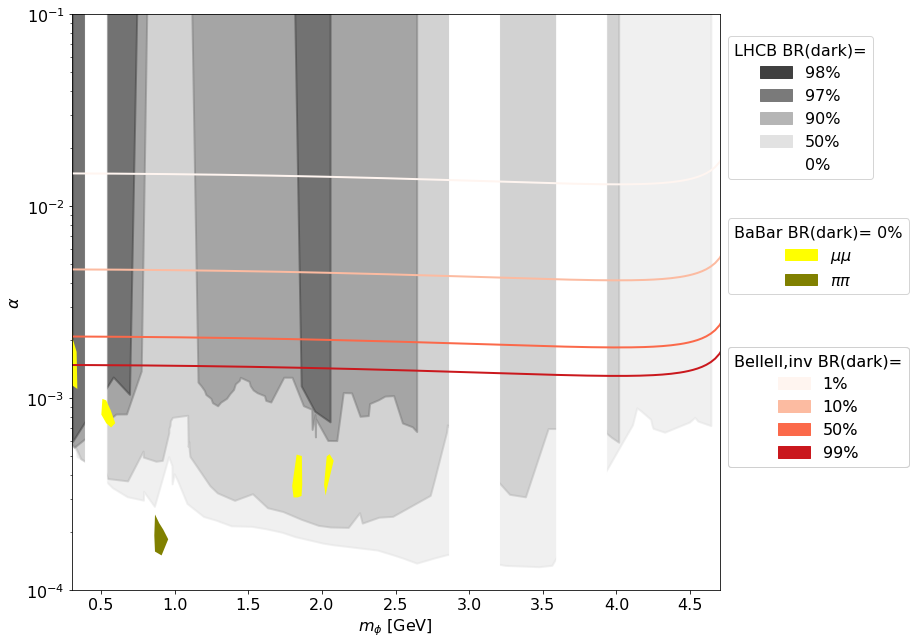

In [20]:
fig=plt.figure(figsize=(15, 10))
ax  = fig.add_subplot(111)
ax.set_position([0.1,0.1,0.6,0.8])

#LHCB plots
plotFromFolder("results/LHCB",False,"fill",cm.Greys,2)
plotWhiteRegions(10**(0))


patch0 = mpatches.Patch(color=usedcolors[4], label='98%')
patch1 = mpatches.Patch(color=usedcolors[3], label='97%')
patch2 = mpatches.Patch(color=usedcolors[2], label='90%')
patch3 = mpatches.Patch(color=usedcolors[1], label='50%')
patch4 = mpatches.Patch(color=usedcolors[0], label='0%')

LHCBLegend=plt.legend(handles=[patch0,patch1,patch2,patch3,patch4],loc='lower left',\
           bbox_to_anchor=(1, 0.7, 0.5, 1),title="LHCB BR(dark)=")
plt.gca().add_artist(LHCBLegend)



babarFolder="results/BaBar/"
belleIIFoder="results/BelleII/"

mucolor="yellow"
picolor="olive"

#BaBar plots
plotGen(babarFolder+"0-0-m-alpha_exclusion_DBR0_BaBar_mumu.dat","polygon", mucolor,1)
plotGen(babarFolder+"0-1-m-alpha_exclusion_DBR0_BaBar_mumu.dat","polygon", mucolor,1)
plotGen(babarFolder+"0-2-m-alpha_exclusion_DBR0_BaBar_mumu.dat","polygon", mucolor,1)
plotGen(babarFolder+"0-3-m-alpha_exclusion_DBR0_BaBar_mumu.dat","polygon", mucolor,1)
plotGen(babarFolder+"1-m-alpha_exclusion_DBR0_BaBar_pipi.dat","polygon", picolor,1)



ax.set_xlim( (0.3, 4.7))
ax.set_ylim((10**(-4),1*10**(-1)))

#plt.title(''.format(i))
ax.set_xlabel('$m_\\phi$ [GeV]')
ax.set_ylabel('$\\alpha$')

ax.set_yscale("log")


patch5 = mpatches.Patch(color=mucolor, label='$\\mu \\mu$')
patch6 = mpatches.Patch(color=picolor, label='$\\pi \\pi$')


babarLegend=plt.legend(handles=[patch5,patch6],loc='lower left',\
           bbox_to_anchor=(1, 0.5, 0.5, 2),title="BaBar BR(dark)= 0%")
plt.gca().add_artist(babarLegend)

# BelleII B->K inv plots
plotFromFile(belleIIFoder+"RchiInv_sens0.22.dat",1,[1,2,3,5],"line",cm.Reds,2)
patch0BelleII = mpatches.Patch(color=usedcolors[0], label='1%')
patch1BelleII = mpatches.Patch(color=usedcolors[1], label='10%')
patch2BelleII = mpatches.Patch(color=usedcolors[2], label='50%')
patch3BelleII = mpatches.Patch(color=usedcolors[3], label='99%')

belleIILegendInv=plt.legend(handles=[patch0BelleII,patch1BelleII,patch2BelleII,patch3BelleII],loc='lower left',\
           bbox_to_anchor=(1, 0.2, 0.5, 2),title="BelleII,inv BR(dark)=")
plt.gca().add_artist(belleIILegendInv)


#ax.legend(handles=[patch0,patch1,patch2,patch3,patch4],loc='lower left',\
#           bbox_to_anchor=(1, 0.3, 0.5, 1),title="LHCB BR(dark)=")

#fig.savefig('./results/m-alpha_combined+Belle.png')